# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [159]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

In [160]:
data=pd.read_csv('/Users/aslahmp/Documents/college/class/pa/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [161]:
level=data["Level"].values
salary=data["Salary"].values

In [162]:
level

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

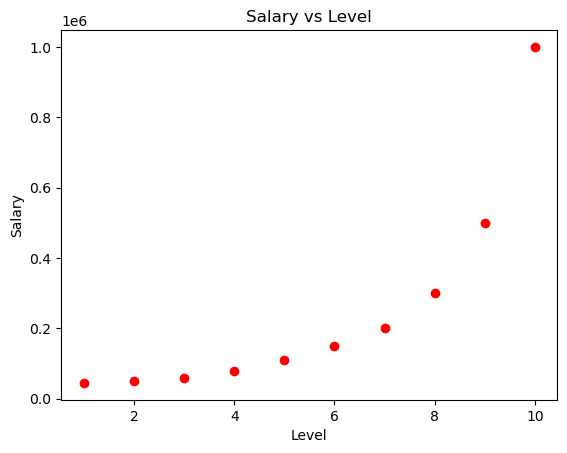

In [163]:


plt.scatter(level, salary, color = 'red')

# Add title and labels
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')

# Show the plot
plt.show()

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> * no
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> * no
* Explain why you said yes or no to the above questions.
> * Data is non-linear



## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b



**Construct a Cost function:**
$$MSE(w_1,w_2,b)= your\;answer$$

In [164]:
# your code to plot the cost function (if required)
X=level
y=salary

X_design = np.column_stack((np.ones_like(X), X, X**2))  # Add column of ones for the intercept and X^2 term


weights = np.linalg.lstsq(X_design, y, rcond=None)[0]



In [165]:
weights

array([ 232166.66666667, -132871.21212121,   19431.81818182])

In [166]:
def second_order_model(x):
    return weights[0] + weights[1]*x + weights[2]*x**2

In [167]:
predicted_y = second_order_model(X)

In [168]:
predicted_y

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

In [169]:

squared_diff = (y - predicted_y) ** 2
mse = np.mean(squared_diff)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 6758833333.33334


### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * yes
* Explain why you said yes or no to the above questions.
> * MSE is a commonly used cost function for regression problems,predicted values quite far from the actual values

**Derivatives of cost function:**
$$\frac{\partial MSE}{\partial w_1} = \frac{-2}{n} \sum_{i=1}^{n} x_{1i}^2 (y_i - (w_1 x_{1i}^2 + w_2x_{1i} + b))$$

**Gradient Descent Algorithm:**
```
Repeat until converges:
```
$$
    theta = theta - alpha * gradient
$$

## Implementation of the model

In [170]:
# Write a code/ function to do the following

# function for your model


# a function for your cost function

# function to calculate the derivatives

# code to estimate the parametes using gradient descent
# Aslo estimate the cost function in each iteration

# Plot the model with the data given
# plot the iteratio VS cost

# estimate the solution to the given problem

# mark the point or result in the graph (plot)

# Estimate the model performance

In [171]:
class polynomialRegression():

  def __init__(self):
    #No instance Variables required
    pass
# function for your model

  def forward(self,X,y,W):

    y_pred = sum(W * X)
    # a function for your cost function
    loss = ((y_pred-y)**2)/2    #Loss = Squared Error, we introduce 1/2 for ease in the calculation
    return loss, y_pred

  def updateWeights(self,X,y_pred,y_true,W,alpha,index):

    for i in range(X.shape[1]):
 # function to calculate the derivatives

      #alpha = learning rate, rest of the RHS is derivative of loss function
      W[i] -= (alpha * (y_pred-y_true[index])*X[index][i]) 
    return W

  def train(self, X, y, epochs=10, alpha=0.001, random_state=0):


    num_rows = X.shape[0] #Number of Rows
    num_cols = X.shape[1] #Number of Columns 
    W = np.random.randn(1,num_cols) / np.sqrt(num_rows) #Weight Initialization

    #Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    # code to estimate the parametes using gradient descent

    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.updateWeights(X,y_pred,y,W[0],alpha,i)
      # Aslo estimate the cost function in each iteration  
      train_loss.append(cost)
      num_epochs.append(j)
    return W[0], train_loss, num_epochs

  def test(self, X_test, y_test, W_trained):

    test_pred = []
    test_loss = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
        test_pred.append(y_test_pred)
        test_loss.append(loss)
    return test_pred, test_loss
    

  def predict(self, W_trained, X_sample):
    prediction = sum(W_trained * X_sample)
    return prediction

  def plotLoss(self, loss, epochs):

    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()

In [172]:
print(X, y)

[ 1  2  3  4  5  6  7  8  9 10] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [173]:
X = np.asarray(data['Level'].values.tolist())

In [174]:
X = X.reshape(-1,1)
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [175]:
def poly_features(features, X):
  data = pd.DataFrame(np.zeros((X.shape[0],features)))
  for i in range(1,features+1):
    data.iloc[:,i-1] = (X**i).reshape(-1,1)
  X_poly = np.array(data.values.tolist())
  return X_poly

In [176]:
X = poly_features(2,X)
X

array([[  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.],
       [  6.,  36.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.]])

In [177]:
y = np.asarray(data['Salary'].values.tolist()) 
y = y.reshape(len(y),1)

In [178]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [179]:
X = np.concatenate((X,np.ones((10,1))), axis = 1)
X

array([[  1.,   1.,   1.],
       [  2.,   4.,   1.],
       [  3.,   9.,   1.],
       [  4.,  16.,   1.],
       [  5.,  25.,   1.],
       [  6.,  36.,   1.],
       [  7.,  49.,   1.],
       [  8.,  64.,   1.],
       [  9.,  81.,   1.],
       [ 10., 100.,   1.]])

In [180]:
regressor = polynomialRegression()
W_trained, train_loss, num_epochs = regressor.train(X, y, epochs=200, alpha=0.00001)

In [181]:
def pred_to_plot(W_trained, X):
  prediction_values = list()
  for i in range(X.shape[0]):
    value = regressor.predict(W_trained,X[i])
    prediction_values.append(value)
  return prediction_values

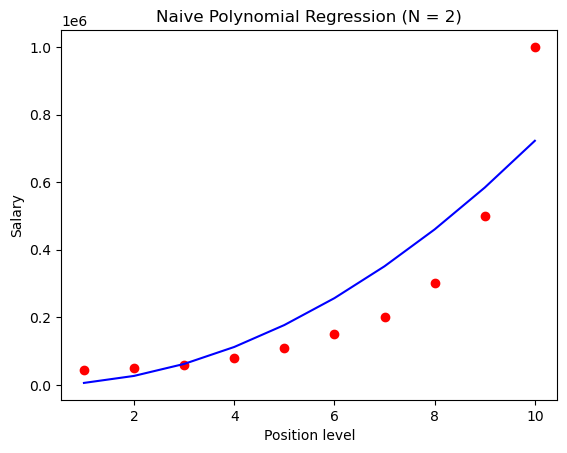

In [182]:
# Plot the model with the data given
pred_plot = pred_to_plot(W_trained,X)
plt.scatter(X[:,0], y, color = 'red')
plt.plot(X[:,0], pred_plot, color = 'blue')
plt.title('Naive Polynomial Regression (N = 2)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

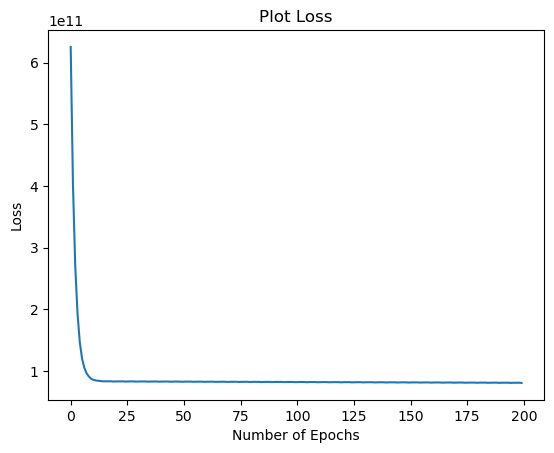

In [183]:
# plot the iteratio VS cost
regressor.plotLoss(train_loss, num_epochs)

In [184]:
t_y,ab=regressor.test(X, y, W_trained)

In [193]:
predict_y=np.array(t_y)
print(predict_y.shape)
print(y.shape)

(10,)
(10, 1)


In [194]:
y_true = y
y_pred = predict_y


In [196]:
# Estimate the model performance
# Calculate MSE
mse = np.mean((y_true - y_pred)**2)
print("Mean Squared Error:", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate MAE
mae = np.mean(np.abs(y_true - y_pred))
print("Mean Absolute Error:", mae)

# Calculate R^2 Score
ss_res = np.sum((y_true - y_pred)**2)
ss_tot = np.sum((y_true - np.mean(y_true))**2)
r2 = 1 - (ss_res / ss_tot)
print("R-squared Score:", r2)

Mean Squared Error: 1495795135500000.0
Root Mean Squared Error: 38675510.79817822
Mean Absolute Error: 20060900.0
R-squared Score: -185438.30221386088


### Answer the following

* What is learning rate?
> * Determines the step size at each iteration
* What will happen if the learning rate is too large?
> * Model might overshoot the optimal point in the loss(not reach minima)
* What will happen if the learning rate is too small?
> * we will need too many iterations to converge to the best values(take more time)
* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
> * Your answer
> * Your answer
> * Your answer
> * Your answer
> * Your answer